# 6.6 Analyzing Time Series Data
1. Import libraries / data / path
2. Data cleaning, wrangling, subsetting
3. Decomposition
4. Dickey-Fuller test for stationarity
5. Check for autocorrelations

# 1. Import libraries / data / path

In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from datetime import datetime
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [5]:
#import data
path = r'C:\Users\TypicalPancake\6.10 Gun Violence 12-2024'

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'cleaned_merged_gv.csv'), index_col = False)

In [9]:
pd.set_option('display.max_columns', None)
df.head(1)

,Unnamed: 0.1,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,Unknown,-79.8559,-1.0,Julian Sims under investigation: Four Shot and...,20.0,Adult 18+,Male,Julian Sims,Unknown,Arrested,Victim,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,-1,-1


# 2. Data cleaning, wrangling, subsetting

In [14]:
# Drop some useless columns and re-export new version
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cleaned_gv_final.csv'))
df.head(1)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,Unknown,-79.8559,-1.0,Julian Sims under investigation: Four Shot and...,20.0,Adult 18+,Male,Julian Sims,Unknown,Arrested,Victim,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,-1,-1


In [24]:
# Create a subset with the desired columns
df_sub = df[['date', 'n_killed']]

In [26]:
# Group by date with the mean of the avg delay
df_sub = df_sub.groupby('date')['n_killed'].mean()

In [28]:
df_sub.head()

date
2013-01-01    0.666667
2013-01-05    4.000000
2013-01-07    3.000000
2013-01-19    5.000000
2013-01-21    0.000000
Name: n_killed, dtype: float64

In [30]:
# Turn df_sub into data frame
df_sub = df_sub.reset_index()
df_sub

,date,n_killed
0,2013-01-01,0.666667
1,2013-01-05,4.000000
2,2013-01-07,3.000000
3,2013-01-19,5.000000
4,2013-01-21,0.000000
...,...,...
1720,2018-03-27,0.133333
1721,2018-03-28,0.240000
1722,2018-03-29,0.251908
1723,2018-03-30,0.359649


In [36]:
df_sub['datetime'] = pd.to_datetime(df_sub['date']) # Create a datetime column from "Date.""
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,n_killed
datetime,
2013-01-01,0.666667
2013-01-05,4.000000
2013-01-07,3.000000
2013-01-19,5.000000
2013-01-21,0.000000


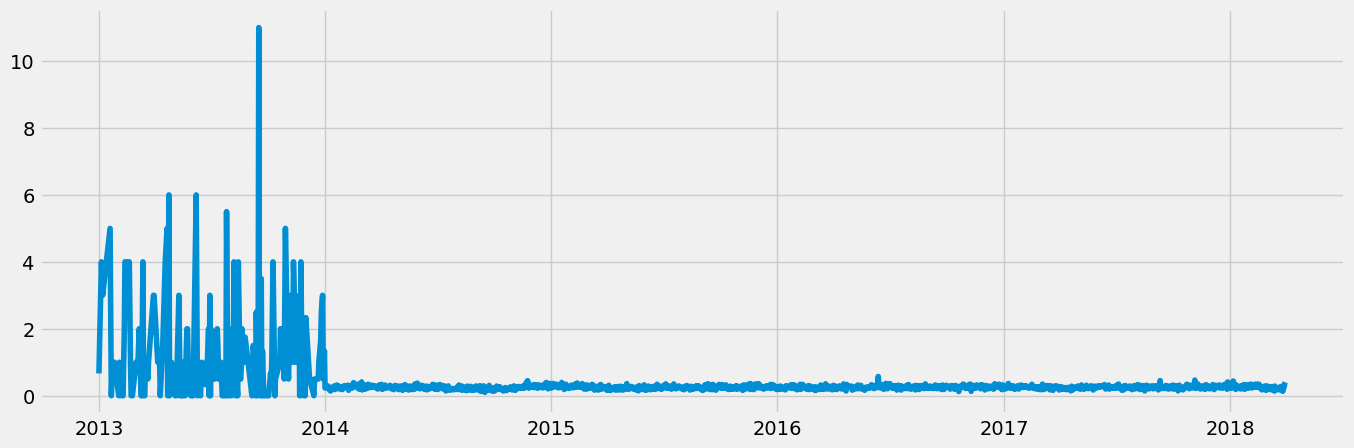

In [38]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [40]:
# Check for missing values
df_sub.isnull().sum() 

n_killed    0
dtype: int64

It looks like there was a huge increase of muli victims from 2013 - 2014 then up to 2018 became at least 1 victim

# 3. Decomposition

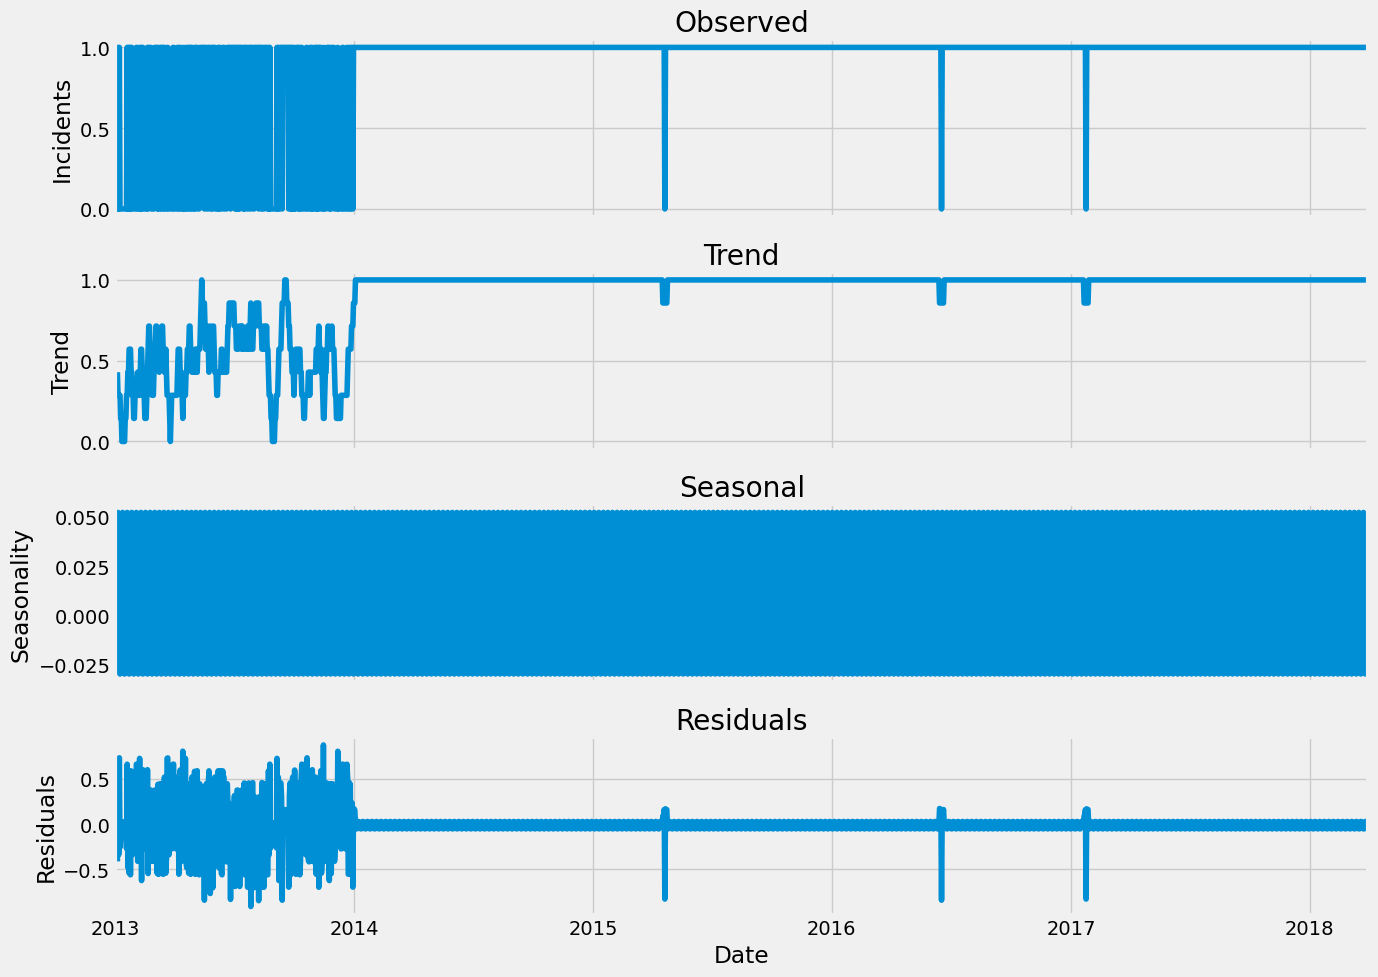

In [64]:
# Aggregate the data to count the number of incidents per day
daily_incidents = df_sub.resample('D').size()

# Decompose the time series using an additive model
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Plot observed data
decomposition.observed.plot(ax=axes[0], title='Observed')
axes[0].set_ylabel('Incidents')

# Plot trend
decomposition.trend.plot(ax=axes[1], title='Trend')
axes[1].set_ylabel('Trend')

# Plot seasonal component
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
axes[2].set_ylabel('Seasonality')

# Plot residuals
decomposition.resid.plot(ax=axes[3], title='Residuals')
axes[3].set_ylabel('Residuals')
axes[3].set_xlabel('Date')

# Improve layout
plt.tight_layout()
plt.show()

The decomposed time series reveals several key patterns. The trend component shows the long-term changes in daily incidents, highlighting periods of increase or decrease. The seasonal component captures recurring patterns, potentially indicating higher incident rates during specific times of the year. Finally, the residuals reflect irregular variations, with spikes possibly corresponding to outlier events like mass shootings. These insights help identify underlying patterns and anomalies for further analysis.

# 4. Dickey-Fuller test for stationarity

In [78]:
# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(daily_incidents.dropna())

# Display the results
adf_results = {
    "Test Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Lags Used": adf_test[2],
    "Number of Observations": adf_test[3],
    "Critical Values": adf_test[4]
}

adf_results


{'Test Statistic': -3.1142175883573704,
 'p-value': 0.02551875886235754,
 'Lags Used': 26,
 'Number of Observations': 1889,
 'Critical Values': {'1%': -3.4338164946764294,
  '5%': -2.863071261312085,
  '10%': -2.5675851863579537}}

# 5. Check for autocorrelations

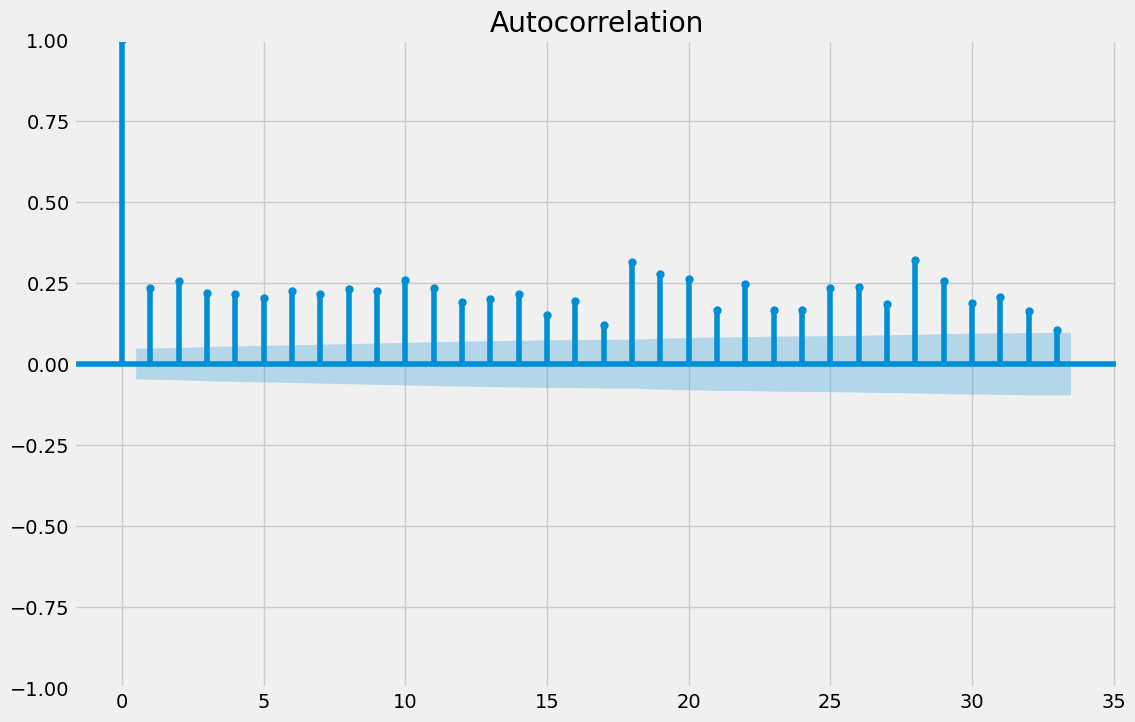

In [74]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_sub)
plt.show()

The autocorrelation plot shows significant correlations at initial lags, indicating that past values strongly influence current values in the time series. The gradual decay of autocorrelations suggests some level of persistence, but no sharp periodic spikes point to weak or no strong seasonality. This pattern is typical of many time-series datasets and can inform future modeling approaches.